In [1]:
## To put data in tables
## Not really used, but I like having it just in case for spontaneous analyses
import pandas as pd

## Visualzie data
import matplotlib.pyplot as plt

## Numpy for quick arrays and math
import numpy as np

## Jupyter magic for visualizations
%matplotlib inline

# Context

Within the game of Dungeons and Dragons, players create characters to roleplay as in the world that their Dungeon Master (DM) creates.

The capabilities of the character are defined through 6 Ability Scores
   - Strength, measuring physical power
   - Dexterity, measuring agility
   - Constitution, measuring endurance
   - Intelligence, measuring reasoning and memory
   - Wisdom, measuring Perception and Insight
   - Charisma, measuring force of Personality

## Generating Scores

Two of the most common ways to determine these scores are the "Standard Array" in which the numbers [15, 14, 13, 12, 10, 8] are allocated to the scores based on player preference/want

OR

For those not afraid of taking risk, the 4d6 method. This method uses dice rolling to generate an array of 6 numbers that can be allocated.

This method works the following way
1. Roll 4 6-sided dice
2. (Optional) Re-roll any 1's 
3. Drop the lowest number
4. Sum the dice to get the ability score
5. Repeat steps 1-4 five more times
6. These are your 6 ability scores you can allocate as you see fit.

# Goal of this Notebook

Lets assume we roll dice to find our ability scores. How do we determine whether this is a "Good" character? In other words, how do we know whether we are more likely to find a better character if we try to re-roll again?

Similarly, how "good" is the standard array?

This note book aims to come up with a statistical way to define whether a character that is rolled is "Good" or if a player should try to create a different character.

## Considerations and Limitations

Note that there are many ways to determine "Better". Similarly, there are many things that may affect our interpretation of ability scores (e.g. modifiers, relevancy, dump stats, classes, racial traits, etc.)

We will start by focusing on strictly scores as they exist, and then move on to more in-depth considerations (time and knowledge permitting).

In [2]:
## Defining the standard array. This is the baseline against what we will be comparing characters to
standard_array = np.array([15, 14, 13, 12, 10, 8])

## The sum of scores of the standard array
standard_array_sum = sum(standard_array)


## We want to make sure we have a greater than 50% chance of developing a better character
## Lets assume 2 dump stats, 2 key stats, 2 "whatever" stats
## How do we figure out which is better?

In [3]:
## Defining a function that will let us simulate a 4d6 creation method for a single score
def roll_score(number_of_dice = 4, dice_min = 1, dice_max = 6, drop_lowest=True):
    """
    Returns an NP array of dice rolls. 
    Note that we add 1 in 'high = dice_max + 1' because the 'high' argument in numpy is exclusive.
    If your DM lets you re-roll 1's, set dice_min to 2
    If you instead use different dice to set your score (e.g. a 4 or 8 or 10 or 12 sided die) set "dice max" to the number of sides
    If your DM does not let you drop your lowest, change "drop lowest" to False
    """
    this_roll = np.array([np.random.randint(low = dice_min, high = dice_max + 1) for i in range(number_of_dice)])
    if(drop_lowest):
        this_roll = np.delete(this_roll, this_roll.argmin())
    return np.sum(this_roll)

# Getting the data

We will simulate 10000 rolls and use this as our dataset/population to sample from.

In [4]:
## Simulating 10000 score generations

## An array to store the scores we roll
total_rolls = []

## 10000 iterations for that large sample size
for i in range (10000):
    ## Generating scores and appending it to the array we're storing scores in.
    total_rolls.append(roll_score())
total_rolls = np.array(total_rolls)

# Visualizing the data

What does our score distribution look like? Note that we did NOT re-roll 1's but we DID drop the lowest of 4 6-sided dice.

[]

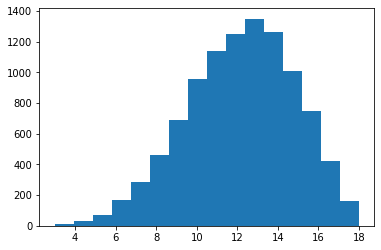

In [5]:
## Get the unique combinations with their respective counts
combinations, occurrences = np.unique(total_rolls, return_counts = True)

## Plot the distribution of scores with as many bins as there are combinations
plt.hist(total_rolls, bins = len(combinations))
plt.plot()

In [6]:
print("There are {} total possible scores".format(len(combinations)))
print("The possible scores with their respective probability are \n{}".format(list(zip(combinations,occurrences/100))))
print("Mean = {}".format(total_rolls.mean()))
print("Median = {}".format(np.median(total_rolls)))
print("Standard Deviation = {}".format(total_rolls.std()))

There are 16 total possible scores
The possible scores with their respective probability are 
[(3, 0.1), (4, 0.3), (5, 0.69), (6, 1.68), (7, 2.84), (8, 4.61), (9, 6.86), (10, 9.58), (11, 11.37), (12, 12.47), (13, 13.49), (14, 12.64), (15, 10.07), (16, 7.46), (17, 4.23), (18, 1.61)]
Mean = 12.2767
Median = 12.0
Standard Deviation = 2.8423119304537985


# Defining "Better"

If we set the "Standard Array" as our baseline, how do we determine what is "Better" than it? Presently, I can think of two ways.

## Sum of Scores

The total sum of the 6 scores in the "Standard Array" is 72. So this method states that if the sum of the scores we roll is greater than 72, we've made a better character.

So yes, this would mean a score set of [18, 18, 18, 6, 6, 6] would be the same as a score of [12, 12, 12, 12, 12, 12]. And both of them would be the same as the Standard Array [15, 14, 13, 12, 10, 8].

## Ordered Array Improvement

This method states that a new ability score set is only "better" if the scores in the sorted array are better than the respective scores in the Standard Array.

In other words, if we rolled [A, B, C, D, E, F], we would want A >= 15, B >= 14, ... until F >= 8

Note how the standard array is sorted as [15, 14, 13, 12, 10, 8].

When taking into account "Dump Stats" we can also add "Threshhold" values to state that we only care if the "n" largest scores we rolled are greater than the "n" largest scores in the Standard Array.

# Sum of Scores Method

How many scores will be better than 72?

In [7]:
## Where we will store the new score sums
rolled_score_sums = []

for i in range(10000):
    ## Sampling 6 scores at a time from our data, then adding them together and appending it to our array
    rolled_score_sums.append(np.sum(np.random.choice(total_rolls, 6)))

## Turning the array into a numpy array for easy and fast array operations
rolled_score_sums = np.array(rolled_score_sums)

There are 51 total possible scores
The possible scores with their respective probability are 
[(45, 0.01), (47, 0.02), (48, 0.03), (49, 0.01), (50, 0.04), (51, 0.02), (52, 0.02), (53, 0.11), (54, 0.12), (55, 0.17), (56, 0.2), (57, 0.3), (58, 0.7), (59, 0.76), (60, 0.92), (61, 1.21), (62, 1.36), (63, 1.56), (64, 1.99), (65, 2.42), (66, 3.09), (67, 3.54), (68, 3.78), (69, 4.57), (70, 4.96), (71, 4.93), (72, 5.32), (73, 6.19), (74, 5.36), (75, 5.51), (76, 5.39), (77, 5.4), (78, 4.99), (79, 4.5), (80, 4.28), (81, 3.27), (82, 2.99), (83, 2.36), (84, 2.13), (85, 1.44), (86, 1.26), (87, 0.83), (88, 0.62), (89, 0.43), (90, 0.37), (91, 0.26), (92, 0.12), (93, 0.06), (94, 0.05), (95, 0.01), (96, 0.02)]
Mean = 73.6893
Median = 74.0
Standard Deviation = 6.9544780904105234


[]

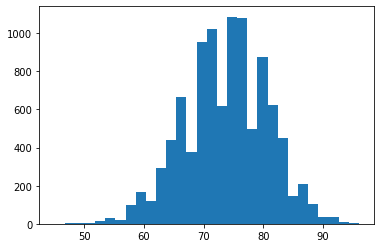

In [8]:
combinations, occurrences = np.unique(rolled_score_sums, return_counts=True)
print("There are {} total possible scores".format(len(combinations)))
print("The possible scores with their respective probability are \n{}".format(list(zip(combinations,occurrences/100))))
print("Mean = {}".format(rolled_score_sums.mean()))
print("Median = {}".format(np.median(rolled_score_sums)))
print("Standard Deviation = {}".format(rolled_score_sums.std()))

## What does this distribution look like?
plt.hist(rolled_score_sums, bins = 30)
plt.plot()

In [9]:
## So what percent of our rolls have a score better than 72?
## We can do this by filtering our "rolled score sums" by where they are greater than or equal to 72
## Then identifying the percentage of how many fit our criteria

print("By rolling dice, there is a {}% chance the sum of your scores will be greater than {}".format(sum(rolled_score_sums > standard_array_sum) / 100, standard_array_sum))

By rolling dice, there is a 57.84% chance the sum of your scores will be greater than 72


# Ordered Array Improvement

We'll do this two ways

First, by looking at the WHOLE set of scores we generate and ensure that the scores are strictly better.

In [10]:
## An array of score arrays
rolled_scores = []

## Generate 10000 score lists
for i in range(10000):
    ## Append a sorted array of 6 scores to our rolled_scores array
    rolled_scores.append(np.sort(np.random.choice(total_rolls,6)))

rolled_scores = np.array(rolled_scores)
## Note that Numpy sorts in ascending order. So we need to make sure our Standard Array is also in ascending order

sorted_standard_array = np.sort(standard_array)

There are 7 total possible scores
The possible scores with their respective probability are 
[(0, 14.47), (1, 17.65), (2, 17.62), (3, 14.56), (4, 12.67), (5, 11.01), (6, 12.02)]
Mean = 2.7442
Median = 3.0
Standard Deviation = 1.9411250243093565


[]

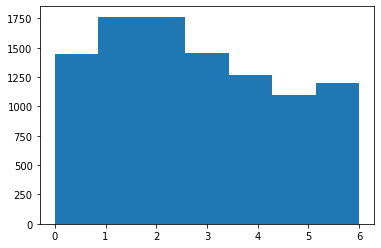

In [11]:
## Comparing every array to the standard array. Basically a big array of arrays with 1 and 0 in them
## 1 where the number is greater than the respective number in the standard array. 0 where it isn't.
scored_array = np.where(rolled_scores>sorted_standard_array,1,0)

## Since we now have our score arrays as arrays of 1 and 0,
## we find the sum of each array to identify how many of the scores that we rolled were greater than the standard array
## Create an array of the sum of scores
scored_array_sums = np.sum(scored_array,axis=1)

## Basic statistics on what the scores look like
combinations, occurrences = np.unique(scored_array_sums, return_counts=True)
print("There are {} total possible scores".format(len(combinations)))
print("The possible scores with their respective probability are \n{}".format(list(zip(combinations,occurrences/100))))
print("Mean = {}".format(scored_array_sums.mean()))
print("Median = {}".format(np.median(scored_array_sums)))
print("Standard Deviation = {}".format(scored_array_sums.std()))

## What does this distribution look like?
plt.hist(scored_array_sums, bins=7)
plt.plot()

In [12]:
for i in range(6):
    print("The percentage chance of having at least {} scores greater than the respective score in the standard array is {}%".format(i+1,
                                                                                                                                     np.sum(scored_array_sums>i)/100))

The percentage chance of having at least 1 scores greater than the respective score in the standard array is 85.53%
The percentage chance of having at least 2 scores greater than the respective score in the standard array is 67.88%
The percentage chance of having at least 3 scores greater than the respective score in the standard array is 50.26%
The percentage chance of having at least 4 scores greater than the respective score in the standard array is 35.7%
The percentage chance of having at least 5 scores greater than the respective score in the standard array is 23.03%
The percentage chance of having at least 6 scores greater than the respective score in the standard array is 12.02%


# Other ways to explore

We're looking strictly at "greater than". What if we expanded to "greater than or equal to"?

Can we prioritize high scores more than lower scores?

How do we incorporate dump stats?

What if we took the differences of scores in the sorted array?

What if we looked at the modifiers and whether an additional point would make a difference?

Note that [12, 12, 12, 12, 12, 12] is statistically the most likely score result. Could we incorporate this somehow?

We can think about this later.

# Key takeaways

In general it seems that rolling scores will in the long run yield better ability scores.

I think next steps would be to look at just prime stats (e.g. excluding dump stats) and the [12] array.